# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: Arda Deniz Ayyıldız
## Student ID: 2210765018


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).
 

## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


In [75]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [76]:
df.fillna(0, inplace=True)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
df_capped

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15.00,39
1,2,0,21,15.00,81
2,3,1,20,16.00,6
3,4,1,23,16.00,77
4,5,1,31,17.00,40
...,...,...,...,...,...
195,196,1,35,120.00,79
196,197,1,45,126.00,28
197,198,0,32,126.00,74
198,199,0,32,132.75,18


## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

In [77]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = MinMaxScaler()
df_capped[numerical_cols] = scaler.fit_transform(df_capped[numerical_cols])
df_capped


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,0.019231,0.000000,0.387755
1,2,0,0.057692,0.000000,0.816327
2,3,1,0.038462,0.008493,0.051020
3,4,1,0.096154,0.008493,0.775510
4,5,1,0.250000,0.016985,0.397959
...,...,...,...,...,...
195,196,1,0.326923,0.891720,0.795918
196,197,1,0.519231,0.942675,0.275510
197,198,0,0.269231,0.942675,0.744898
198,199,0,0.269231,1.000000,0.173469


In [78]:
from sklearn.decomposition import PCA

X = df_capped.drop(['CustomerID'], axis=1) 

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca


,PC1,PC2
0,0.532361,-0.226738
1,0.513348,-0.491972
2,-0.446834,0.088078
3,-0.479359,-0.365608
4,-0.452537,0.003978
...,...,...
195,-0.441814,-0.238801
196,-0.404700,0.255117
197,0.556175,-0.318094
198,0.585926,0.071023


## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

In [79]:
import matplotlib.pyplot as plt

df_normalized = df_capped.copy()

X = df_normalized[numerical_cols]
pca = PCA()
principal_components = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()



In [80]:
explained_variance_ratio

array([0.4925289 , 0.25814622, 0.24932487])

In [81]:
cumulative_explained_variance

array([0.4925289 , 0.75067513, 1.        ])

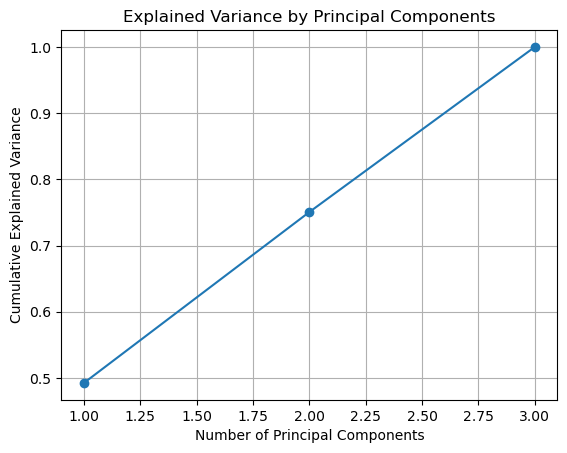

In [82]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [83]:
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)
principal_components

array([[-0.19154654, -0.38020592],
       [-0.45749915, -0.39546722],
       [ 0.05321944, -0.35999935],
       [-0.40169658, -0.38575797],
       [-0.03100803, -0.36485755],
       [-0.40885876, -0.37680679],
       [ 0.26272593, -0.34460957],
       [-0.52101061, -0.37487523],
       [ 0.68925632, -0.33811098],
       [-0.26928774, -0.35924418],
       [ 0.65424363, -0.34236958],
       [-0.38829494, -0.3694474 ],
       [ 0.52116579, -0.33328993],
       [-0.38838956, -0.3519148 ],
       [ 0.24137551, -0.33035479],
       [-0.43036606, -0.35242018],
       [ 0.05926052, -0.32953964],
       [-0.36753743, -0.33906336],
       [ 0.33873706, -0.31221114],
       [-0.38197939, -0.33514026],
       [ 0.0587484 , -0.30407803],
       [-0.34708898, -0.31663829],
       [ 0.42241781, -0.28600288],
       [-0.26332052, -0.30878494],
       [ 0.47083907, -0.26461141],
       [-0.35479787, -0.28633705],
       [ 0.21895933, -0.27011064],
       [-0.12389254, -0.2794459 ],
       [ 0.15583771,

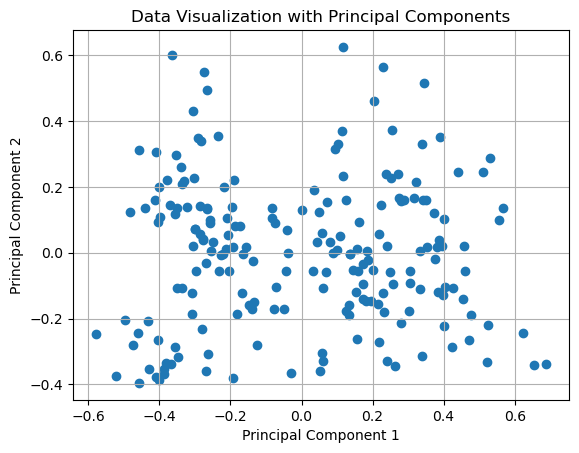

In [84]:
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization with Principal Components')
plt.grid(True)
plt.show()


## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

c:\Users\Arda Deniz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


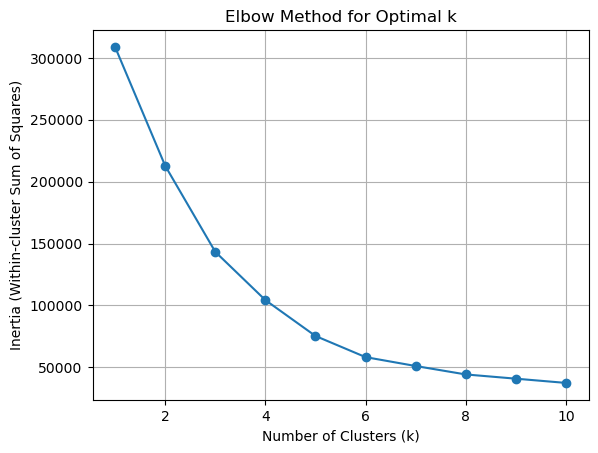

In [85]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    inertia.append(kmeans.inertia_)


plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


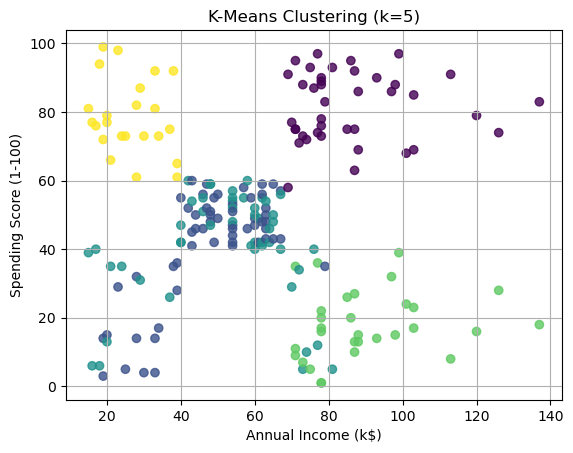

In [86]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_normalized[numerical_cols])

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.grid(True)
plt.show()

### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

In [87]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

hac_complete = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='complete')
df['HAC_Cluster_Complete'] = hac_complete.fit_predict(df_normalized[numerical_cols])

hac_average = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='average')
df['HAC_Cluster_Average'] = hac_average.fit_predict(df_normalized[numerical_cols])



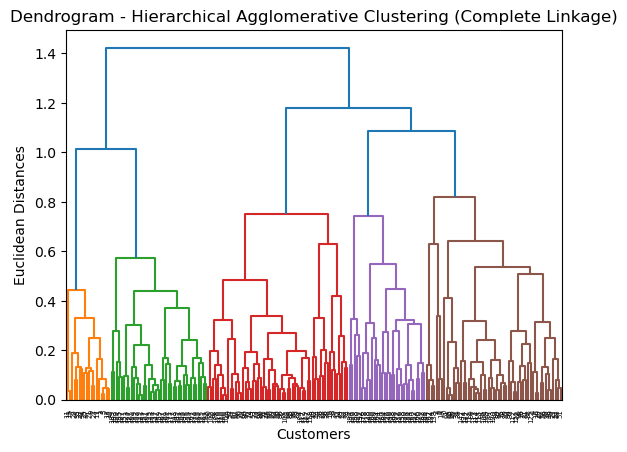

In [88]:
dendrogram_complete = sch.dendrogram(sch.linkage(df_normalized[numerical_cols], method='complete'))
plt.title('Dendrogram - Hierarchical Agglomerative Clustering (Complete Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

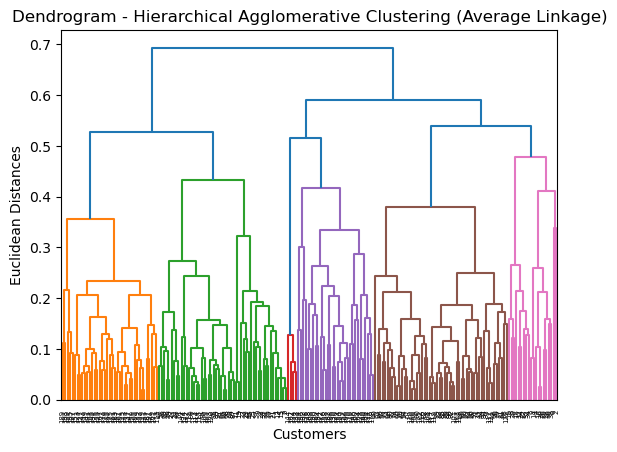

In [89]:
dendrogram_average = sch.dendrogram(sch.linkage(df_normalized[numerical_cols], method='average'))
plt.title('Dendrogram - Hierarchical Agglomerative Clustering (Average Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

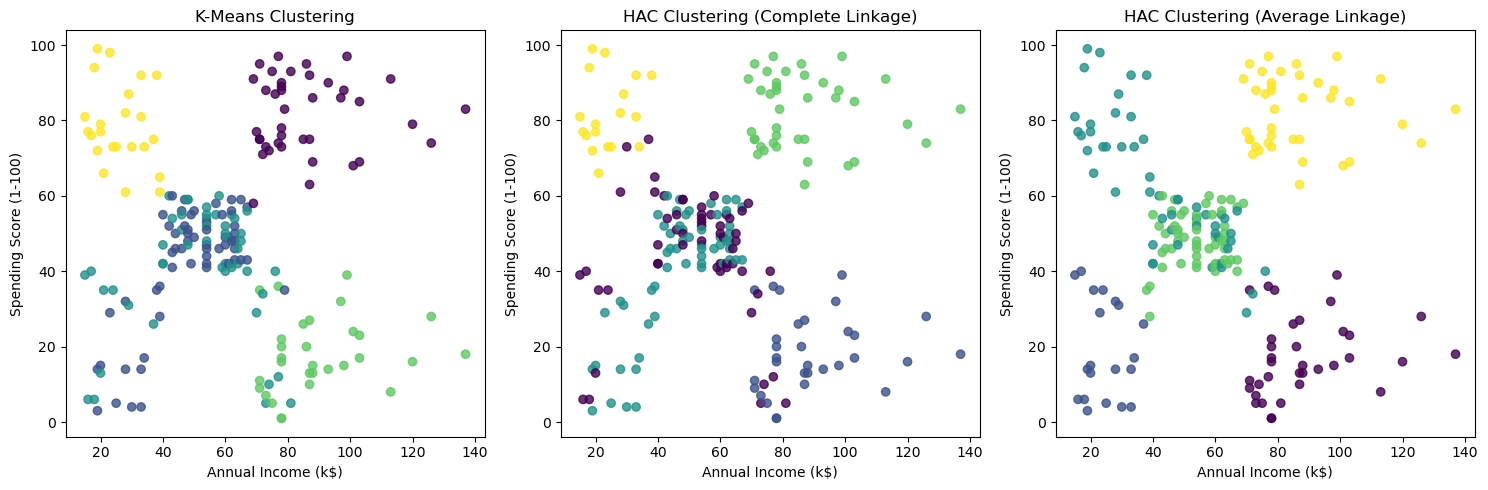

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.8)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')

axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['HAC_Cluster_Complete'], cmap='viridis', alpha=0.8)
axes[1].set_title('HAC Clustering (Complete Linkage)')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

axes[2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['HAC_Cluster_Average'], cmap='viridis', alpha=0.8)
axes[2].set_title('HAC Clustering (Average Linkage)')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

#According to these graphs the dendograms agree with the clusters obtained by K-Means.

## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

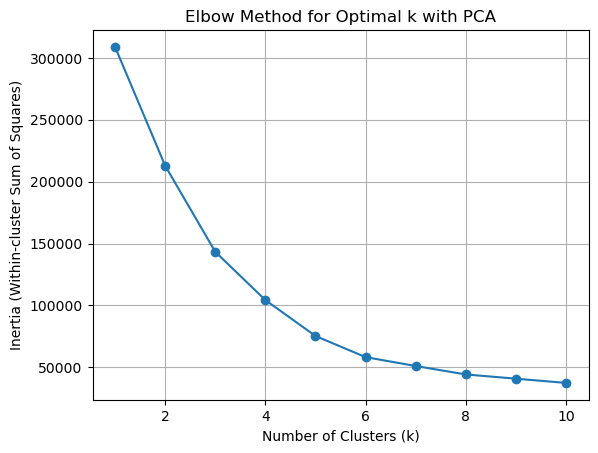

In [91]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k with PCA')
plt.grid(True)
plt.show()

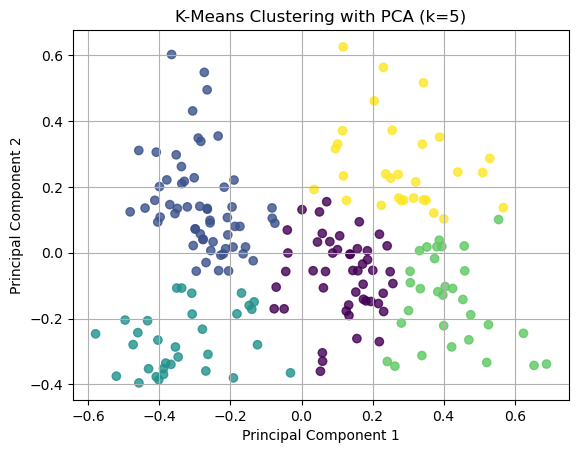

In [92]:
optimal_k = 5

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_PCA'] = kmeans_pca.fit_predict(principal_components)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['Cluster_PCA'], cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with PCA (k={optimal_k})')
plt.grid(True)
plt.show()

## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_normalized[numerical_cols])

silhouette_coefficient_without_pca = silhouette_score(df_normalized[numerical_cols], df['Cluster'])
print(f"Silhouette Coefficient without PCA: {silhouette_coefficient_without_pca}")


Silhouette Coefficient without PCA: 0.40796808308874577


In [95]:
pca = PCA()
principal_components = pca.fit_transform(df_normalized[numerical_cols])

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_PCA'] = kmeans_pca.fit_predict(principal_components)

silhouette_coefficient_with_pca = silhouette_score(principal_components, df['Cluster_PCA'])
print(f"Silhouette Coefficient with PCA: {silhouette_coefficient_with_pca}")

Silhouette Coefficient with PCA: 0.40796808308874577


In [96]:
#Their result are the same. I couldn't understand why K-means with PCA has the same result with the original K-means